In [26]:
from citipy import citipy
import pandas as pd
import numpy as np
import requests as req
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

In [3]:
# Andy's api key
api_key = "bab6ed8714b504b5454b34baa8e421bb"

In [4]:
# Generate random cities by lat,lng
# List for holding lat_lngs
lat_lngs = []
cities = []

In [5]:
# create a set of random lat and lng combinations 
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000,size=1500)
lat_lngs=zip(lats, lngs)

In [6]:
# identify nearest city for each lat, lng combo
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # if city is unique, then add it to our cities list
    if city not in cities:
        cities.append(city)

In [7]:
len(cities)

608

In [8]:
# create DataFrame for cities
cities_df = pd.DataFrame({'City': cities})

In [9]:
cities_df.tail()

,City
603,sept-iles
604,yeniseysk
605,romny
606,biak
607,camabatela


In [10]:
# randomly select 500 cities (test with 5)
selected_cities = cities_df.sample(n=600)
selected_cities.head()

,City
255,porto novo
144,jalu
132,seoni
215,ulaangom
279,vila franca do campo


In [11]:
selected_cities["Latitude"] = ""
selected_cities["Longitude"] = ""
selected_cities["Country"] = ""
selected_cities["Temperature"] = ""
selected_cities["Humidity %"] = ""
selected_cities["Wind Speed"] = ""
selected_cities["Cloudiness %"] = ""
selected_cities.head()

,City,Latitude,Longitude,Country,Temperature,Humidity %,Wind Speed,Cloudiness %
255,porto novo,,,,,,,
144,jalu,,,,,,,
132,seoni,,,,,,,
215,ulaangom,,,,,,,
279,vila franca do campo,,,,,,,


In [12]:
# rearrange order of columns
selected_cities = selected_cities[['Country', 'City', 'Latitude', 'Longitude', 'Temperature', 'Humidity %',
                                 'Wind Speed', 'Cloudiness %']]

In [13]:
selected_cities.tail()

,Country,City,Latitude,Longitude,Temperature,Humidity %,Wind Speed,Cloudiness %
293,,tabiauea,,,,,,
347,,qaqortoq,,,,,,
445,,sechura,,,,,,
207,,zaria,,,,,,
299,,tursunzoda,,,,,,


In [14]:
selected_cities.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 600 entries, 255 to 299
Data columns (total 8 columns):
Country         600 non-null object
City            600 non-null object
Latitude        600 non-null object
Longitude       600 non-null object
Temperature     600 non-null object
Humidity %      600 non-null object
Wind Speed      600 non-null object
Cloudiness %    600 non-null object
dtypes: object(8)
memory usage: 42.2+ KB


In [15]:
# counter 
row_count = 0

for index, row in selected_cities.iterrows():
    # Create endpoint URL
    
    city_row = row["City"]
    #target_url = "http://api.openweathermap.org/data/2.5/weather?lat={}&lon={}&units=IMPERIAL&mode=json&APPID={}".format(lat, lng,api_key)
    target_url = "http://api.openweathermap.org/data/2.5/weather?q={}&units=IMPERIAL&mode=json&APPID={}".format(city_row,api_key)
    
    # print log to ensure loop is working correctly
    print("Now retrieving city # " + str(row_count))
    print(target_url)
    row_count +=1
    
    # run requests to grab JSON at the requested URL
    requests = req.get(target_url).json()
    
    # append the lat/lng to appropiate columns
    # use try / except to skip any cities
    
    try:
        selected_cities.set_value(index, "Country", requests["sys"]["country"])
        selected_cities.set_value(index, "Latitude", requests["coord"]["lat"])
        selected_cities.set_value(index, "Longitude", requests["coord"]["lon"])
        selected_cities.set_value(index, "Temperature", requests["main"]["temp_max"])
        selected_cities.set_value(index, "Humidity %", requests["main"]["humidity"])
        selected_cities.set_value(index, "Wind Speed", requests["wind"]["speed"])
        selected_cities.set_value(index, "Cloudiness %", requests["clouds"]["all"])
        
        print("--", end="")
    
    except:
        print(" Missing field... skipping.")

selected_cities.head()

Now retrieving city # 0
http://api.openweathermap.org/data/2.5/weather?q=porto novo&units=IMPERIAL&mode=json&APPID=bab6ed8714b504b5454b34baa8e421bb
--Now retrieving city # 1
http://api.openweathermap.org/data/2.5/weather?q=jalu&units=IMPERIAL&mode=json&APPID=bab6ed8714b504b5454b34baa8e421bb
--Now retrieving city # 2
http://api.openweathermap.org/data/2.5/weather?q=seoni&units=IMPERIAL&mode=json&APPID=bab6ed8714b504b5454b34baa8e421bb
--Now retrieving city # 3
http://api.openweathermap.org/data/2.5/weather?q=ulaangom&units=IMPERIAL&mode=json&APPID=bab6ed8714b504b5454b34baa8e421bb
--Now retrieving city # 4
http://api.openweathermap.org/data/2.5/weather?q=vila franca do campo&units=IMPERIAL&mode=json&APPID=bab6ed8714b504b5454b34baa8e421bb
--Now retrieving city # 5
http://api.openweathermap.org/data/2.5/weather?q=port augusta&units=IMPERIAL&mode=json&APPID=bab6ed8714b504b5454b34baa8e421bb
--Now retrieving city # 6
http://api.openweathermap.org/data/2.5/weather?q=ucluelet&units=IMPERIAL&mode

 Missing field... skipping.
Now retrieving city # 55
http://api.openweathermap.org/data/2.5/weather?q=cape town&units=IMPERIAL&mode=json&APPID=bab6ed8714b504b5454b34baa8e421bb
--Now retrieving city # 56
http://api.openweathermap.org/data/2.5/weather?q=omboue&units=IMPERIAL&mode=json&APPID=bab6ed8714b504b5454b34baa8e421bb
--Now retrieving city # 57
http://api.openweathermap.org/data/2.5/weather?q=baherden&units=IMPERIAL&mode=json&APPID=bab6ed8714b504b5454b34baa8e421bb
--Now retrieving city # 58
http://api.openweathermap.org/data/2.5/weather?q=merauke&units=IMPERIAL&mode=json&APPID=bab6ed8714b504b5454b34baa8e421bb
--Now retrieving city # 59
http://api.openweathermap.org/data/2.5/weather?q=tripoli&units=IMPERIAL&mode=json&APPID=bab6ed8714b504b5454b34baa8e421bb
--Now retrieving city # 60
http://api.openweathermap.org/data/2.5/weather?q=byron bay&units=IMPERIAL&mode=json&APPID=bab6ed8714b504b5454b34baa8e421bb
--Now retrieving city # 61
http://api.openweathermap.org/data/2.5/weather?q=khormu

 Missing field... skipping.
Now retrieving city # 109
http://api.openweathermap.org/data/2.5/weather?q=narsipatnam&units=IMPERIAL&mode=json&APPID=bab6ed8714b504b5454b34baa8e421bb
--Now retrieving city # 110
http://api.openweathermap.org/data/2.5/weather?q=sindor&units=IMPERIAL&mode=json&APPID=bab6ed8714b504b5454b34baa8e421bb
--Now retrieving city # 111
http://api.openweathermap.org/data/2.5/weather?q=namatanai&units=IMPERIAL&mode=json&APPID=bab6ed8714b504b5454b34baa8e421bb
--Now retrieving city # 112
http://api.openweathermap.org/data/2.5/weather?q=dasoguz&units=IMPERIAL&mode=json&APPID=bab6ed8714b504b5454b34baa8e421bb
--Now retrieving city # 113
http://api.openweathermap.org/data/2.5/weather?q=ayia marina&units=IMPERIAL&mode=json&APPID=bab6ed8714b504b5454b34baa8e421bb
--Now retrieving city # 114
http://api.openweathermap.org/data/2.5/weather?q=miltenberg&units=IMPERIAL&mode=json&APPID=bab6ed8714b504b5454b34baa8e421bb
--Now retrieving city # 115
http://api.openweathermap.org/data/2.5/w

--Now retrieving city # 163
http://api.openweathermap.org/data/2.5/weather?q=san cristobal&units=IMPERIAL&mode=json&APPID=bab6ed8714b504b5454b34baa8e421bb
--Now retrieving city # 164
http://api.openweathermap.org/data/2.5/weather?q=chifeng&units=IMPERIAL&mode=json&APPID=bab6ed8714b504b5454b34baa8e421bb
--Now retrieving city # 165
http://api.openweathermap.org/data/2.5/weather?q=saint-pierre&units=IMPERIAL&mode=json&APPID=bab6ed8714b504b5454b34baa8e421bb
--Now retrieving city # 166
http://api.openweathermap.org/data/2.5/weather?q=ushuaia&units=IMPERIAL&mode=json&APPID=bab6ed8714b504b5454b34baa8e421bb
--Now retrieving city # 167
http://api.openweathermap.org/data/2.5/weather?q=egra&units=IMPERIAL&mode=json&APPID=bab6ed8714b504b5454b34baa8e421bb
--Now retrieving city # 168
http://api.openweathermap.org/data/2.5/weather?q=henties bay&units=IMPERIAL&mode=json&APPID=bab6ed8714b504b5454b34baa8e421bb
--Now retrieving city # 169
http://api.openweathermap.org/data/2.5/weather?q=batagay&units=IMP

--Now retrieving city # 217
http://api.openweathermap.org/data/2.5/weather?q=arlit&units=IMPERIAL&mode=json&APPID=bab6ed8714b504b5454b34baa8e421bb
--Now retrieving city # 218
http://api.openweathermap.org/data/2.5/weather?q=koungou&units=IMPERIAL&mode=json&APPID=bab6ed8714b504b5454b34baa8e421bb
 Missing field... skipping.
Now retrieving city # 219
http://api.openweathermap.org/data/2.5/weather?q=belmonte&units=IMPERIAL&mode=json&APPID=bab6ed8714b504b5454b34baa8e421bb
--Now retrieving city # 220
http://api.openweathermap.org/data/2.5/weather?q=naraini&units=IMPERIAL&mode=json&APPID=bab6ed8714b504b5454b34baa8e421bb
--Now retrieving city # 221
http://api.openweathermap.org/data/2.5/weather?q=pustoshka&units=IMPERIAL&mode=json&APPID=bab6ed8714b504b5454b34baa8e421bb
--Now retrieving city # 222
http://api.openweathermap.org/data/2.5/weather?q=becerril&units=IMPERIAL&mode=json&APPID=bab6ed8714b504b5454b34baa8e421bb
--Now retrieving city # 223
http://api.openweathermap.org/data/2.5/weather?q=v

--Now retrieving city # 271
http://api.openweathermap.org/data/2.5/weather?q=terrace bay&units=IMPERIAL&mode=json&APPID=bab6ed8714b504b5454b34baa8e421bb
--Now retrieving city # 272
http://api.openweathermap.org/data/2.5/weather?q=redmond&units=IMPERIAL&mode=json&APPID=bab6ed8714b504b5454b34baa8e421bb
--Now retrieving city # 273
http://api.openweathermap.org/data/2.5/weather?q=valparaiso&units=IMPERIAL&mode=json&APPID=bab6ed8714b504b5454b34baa8e421bb
--Now retrieving city # 274
http://api.openweathermap.org/data/2.5/weather?q=conceicao do araguaia&units=IMPERIAL&mode=json&APPID=bab6ed8714b504b5454b34baa8e421bb
--Now retrieving city # 275
http://api.openweathermap.org/data/2.5/weather?q=bairnsdale&units=IMPERIAL&mode=json&APPID=bab6ed8714b504b5454b34baa8e421bb
--Now retrieving city # 276
http://api.openweathermap.org/data/2.5/weather?q=watrous&units=IMPERIAL&mode=json&APPID=bab6ed8714b504b5454b34baa8e421bb
--Now retrieving city # 277
http://api.openweathermap.org/data/2.5/weather?q=kanan

 Missing field... skipping.
Now retrieving city # 325
http://api.openweathermap.org/data/2.5/weather?q=heffingen&units=IMPERIAL&mode=json&APPID=bab6ed8714b504b5454b34baa8e421bb
--Now retrieving city # 326
http://api.openweathermap.org/data/2.5/weather?q=tucumcari&units=IMPERIAL&mode=json&APPID=bab6ed8714b504b5454b34baa8e421bb
--Now retrieving city # 327
http://api.openweathermap.org/data/2.5/weather?q=samarai&units=IMPERIAL&mode=json&APPID=bab6ed8714b504b5454b34baa8e421bb
--Now retrieving city # 328
http://api.openweathermap.org/data/2.5/weather?q=kodinsk&units=IMPERIAL&mode=json&APPID=bab6ed8714b504b5454b34baa8e421bb
--Now retrieving city # 329
http://api.openweathermap.org/data/2.5/weather?q=saint-louis&units=IMPERIAL&mode=json&APPID=bab6ed8714b504b5454b34baa8e421bb
--Now retrieving city # 330
http://api.openweathermap.org/data/2.5/weather?q=hanyang&units=IMPERIAL&mode=json&APPID=bab6ed8714b504b5454b34baa8e421bb
--Now retrieving city # 331
http://api.openweathermap.org/data/2.5/weath

--Now retrieving city # 379
http://api.openweathermap.org/data/2.5/weather?q=banda aceh&units=IMPERIAL&mode=json&APPID=bab6ed8714b504b5454b34baa8e421bb
--Now retrieving city # 380
http://api.openweathermap.org/data/2.5/weather?q=fethiye&units=IMPERIAL&mode=json&APPID=bab6ed8714b504b5454b34baa8e421bb
--Now retrieving city # 381
http://api.openweathermap.org/data/2.5/weather?q=trincomalee&units=IMPERIAL&mode=json&APPID=bab6ed8714b504b5454b34baa8e421bb
--Now retrieving city # 382
http://api.openweathermap.org/data/2.5/weather?q=sitka&units=IMPERIAL&mode=json&APPID=bab6ed8714b504b5454b34baa8e421bb
--Now retrieving city # 383
http://api.openweathermap.org/data/2.5/weather?q=sorland&units=IMPERIAL&mode=json&APPID=bab6ed8714b504b5454b34baa8e421bb
--Now retrieving city # 384
http://api.openweathermap.org/data/2.5/weather?q=khandyga&units=IMPERIAL&mode=json&APPID=bab6ed8714b504b5454b34baa8e421bb
--Now retrieving city # 385
http://api.openweathermap.org/data/2.5/weather?q=kanniyakumari&units=IMP

--Now retrieving city # 434
http://api.openweathermap.org/data/2.5/weather?q=dawei&units=IMPERIAL&mode=json&APPID=bab6ed8714b504b5454b34baa8e421bb
--Now retrieving city # 435
http://api.openweathermap.org/data/2.5/weather?q=nikolskoye&units=IMPERIAL&mode=json&APPID=bab6ed8714b504b5454b34baa8e421bb
--Now retrieving city # 436
http://api.openweathermap.org/data/2.5/weather?q=palafrugell&units=IMPERIAL&mode=json&APPID=bab6ed8714b504b5454b34baa8e421bb
--Now retrieving city # 437
http://api.openweathermap.org/data/2.5/weather?q=coihaique&units=IMPERIAL&mode=json&APPID=bab6ed8714b504b5454b34baa8e421bb
--Now retrieving city # 438
http://api.openweathermap.org/data/2.5/weather?q=nome&units=IMPERIAL&mode=json&APPID=bab6ed8714b504b5454b34baa8e421bb
--Now retrieving city # 439
http://api.openweathermap.org/data/2.5/weather?q=hoquiam&units=IMPERIAL&mode=json&APPID=bab6ed8714b504b5454b34baa8e421bb
--Now retrieving city # 440
http://api.openweathermap.org/data/2.5/weather?q=matara&units=IMPERIAL&mod

--Now retrieving city # 488
http://api.openweathermap.org/data/2.5/weather?q=sao joao da barra&units=IMPERIAL&mode=json&APPID=bab6ed8714b504b5454b34baa8e421bb
--Now retrieving city # 489
http://api.openweathermap.org/data/2.5/weather?q=gimbi&units=IMPERIAL&mode=json&APPID=bab6ed8714b504b5454b34baa8e421bb
--Now retrieving city # 490
http://api.openweathermap.org/data/2.5/weather?q=zhuhai&units=IMPERIAL&mode=json&APPID=bab6ed8714b504b5454b34baa8e421bb
--Now retrieving city # 491
http://api.openweathermap.org/data/2.5/weather?q=castro&units=IMPERIAL&mode=json&APPID=bab6ed8714b504b5454b34baa8e421bb
--Now retrieving city # 492
http://api.openweathermap.org/data/2.5/weather?q=pacifica&units=IMPERIAL&mode=json&APPID=bab6ed8714b504b5454b34baa8e421bb
--Now retrieving city # 493
http://api.openweathermap.org/data/2.5/weather?q=lethem&units=IMPERIAL&mode=json&APPID=bab6ed8714b504b5454b34baa8e421bb
--Now retrieving city # 494
http://api.openweathermap.org/data/2.5/weather?q=corner brook&units=IMPE

--Now retrieving city # 542
http://api.openweathermap.org/data/2.5/weather?q=tshikapa&units=IMPERIAL&mode=json&APPID=bab6ed8714b504b5454b34baa8e421bb
--Now retrieving city # 543
http://api.openweathermap.org/data/2.5/weather?q=westport&units=IMPERIAL&mode=json&APPID=bab6ed8714b504b5454b34baa8e421bb
--Now retrieving city # 544
http://api.openweathermap.org/data/2.5/weather?q=pacific grove&units=IMPERIAL&mode=json&APPID=bab6ed8714b504b5454b34baa8e421bb
--Now retrieving city # 545
http://api.openweathermap.org/data/2.5/weather?q=hamilton&units=IMPERIAL&mode=json&APPID=bab6ed8714b504b5454b34baa8e421bb
--Now retrieving city # 546
http://api.openweathermap.org/data/2.5/weather?q=san pedro&units=IMPERIAL&mode=json&APPID=bab6ed8714b504b5454b34baa8e421bb
--Now retrieving city # 547
http://api.openweathermap.org/data/2.5/weather?q=columbia&units=IMPERIAL&mode=json&APPID=bab6ed8714b504b5454b34baa8e421bb
--Now retrieving city # 548
http://api.openweathermap.org/data/2.5/weather?q=ponta do sol&unit

--Now retrieving city # 597
http://api.openweathermap.org/data/2.5/weather?q=sechura&units=IMPERIAL&mode=json&APPID=bab6ed8714b504b5454b34baa8e421bb
--Now retrieving city # 598
http://api.openweathermap.org/data/2.5/weather?q=zaria&units=IMPERIAL&mode=json&APPID=bab6ed8714b504b5454b34baa8e421bb
--Now retrieving city # 599
http://api.openweathermap.org/data/2.5/weather?q=tursunzoda&units=IMPERIAL&mode=json&APPID=bab6ed8714b504b5454b34baa8e421bb
--

,Country,City,Latitude,Longitude,Temperature,Humidity %,Wind Speed,Cloudiness %
255,BR,porto novo,-23.68,-45.44,64.4,93,2.24,90
144,LY,jalu,29.03,21.55,42.56,82,2.68,0
132,IN,seoni,22.09,79.55,47.2,74,3.13,0
215,MN,ulaangom,49.98,92.07,-17.7,42,0.67,48
279,PT,vila franca do campo,37.72,-25.43,57.2,76,10.29,75


In [16]:
selected_cities.dtypes

Country         object
City            object
Latitude        object
Longitude       object
Temperature     object
Humidity %      object
Wind Speed      object
Cloudiness %    object
dtype: object

In [17]:
selected_cities.convert_objects(convert_numeric=True)

/Users/andy_felicitas/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.


,Country,City,Latitude,Longitude,Temperature,Humidity %,Wind Speed,Cloudiness %
255,BR,porto novo,-23.68,-45.44,64.40,93.0,2.24,90.0
144,LY,jalu,29.03,21.55,42.56,82.0,2.68,0.0
132,IN,seoni,22.09,79.55,47.20,74.0,3.13,0.0
215,MN,ulaangom,49.98,92.07,-17.70,42.0,0.67,48.0
279,PT,vila franca do campo,37.72,-25.43,57.20,76.0,10.29,75.0
169,AU,port augusta,-32.49,137.76,64.40,55.0,18.34,92.0
19,CA,ucluelet,48.94,-125.55,41.00,86.0,2.24,75.0
1,US,albany,42.65,-73.75,19.40,72.0,17.22,90.0
549,RU,srednekolymsk,67.46,153.71,-3.03,50.0,4.14,8.0
295,AR,gualeguaychu,-33.01,-58.51,71.41,69.0,3.24,12.0


# save df as a csv
selected_cities.to_csv("weather_py_data_3.csv", encoding="utf-8", index=False)

In [18]:
df = pd.read_csv("weather_py_data_3.csv")

In [19]:
df.head()

,Country,City,Latitude,Longitude,Temperature,Humidity %,Wind Speed,Cloudiness %
0,RU,vostok,46.45,135.83,-10.34,67.0,2.95,32.0
1,NaN,amderma,NaN,NaN,NaN,NaN,NaN,NaN
2,NE,ouallam,14.32,2.08,71.75,35.0,10.67,0.0
3,GR,saint george,39.45,22.34,42.80,87.0,3.36,0.0
4,US,dickinson,46.88,-102.79,23.00,73.0,12.75,90.0


In [20]:
df.shape

(600, 8)

In [21]:
df.isnull().sum()

Country         61
City             0
Latitude        54
Longitude       54
Temperature     54
Humidity %      54
Wind Speed      54
Cloudiness %    54
dtype: int64

In [22]:
new_df = df.dropna(how='any')

In [23]:
new_df.head()

,Country,City,Latitude,Longitude,Temperature,Humidity %,Wind Speed,Cloudiness %
0,RU,vostok,46.45,135.83,-10.34,67.0,2.95,32.0
2,NE,ouallam,14.32,2.08,71.75,35.0,10.67,0.0
3,GR,saint george,39.45,22.34,42.80,87.0,3.36,0.0
4,US,dickinson,46.88,-102.79,23.00,73.0,12.75,90.0
5,FR,guipavas,48.43,-4.40,51.80,93.0,6.93,90.0


In [24]:
new_df.shape

(539, 8)

In [25]:
new_df.to_csv('temp_city_data.csv')

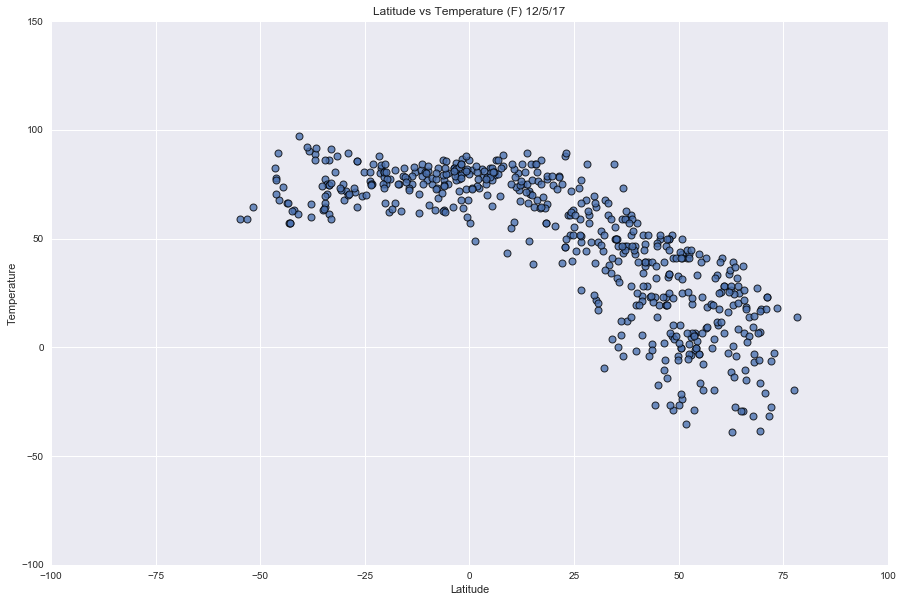

In [36]:
# plot Temperature vs Latitude

sns.set()
plt.figure(figsize=(15,10))
plt.title("Latitude vs Temperature (F) 12/5/17")
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.grid(True)
plt.xlim([-100, 100])
plt.ylim([-100, 150])

plt.scatter(new_df["Latitude"],
           new_df["Temperature"],
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8)

plt.savefig("Temp.png")
# plt.show()

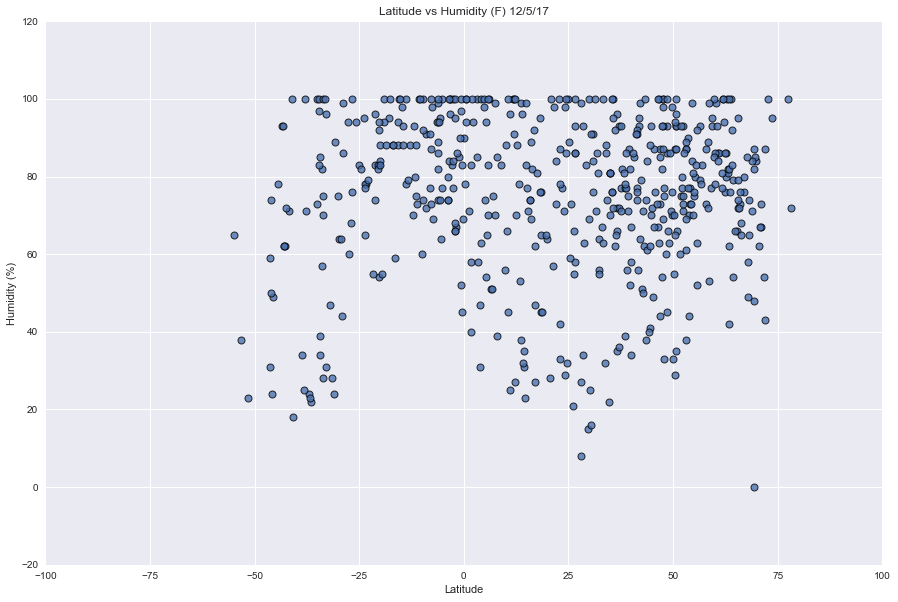

In [40]:
sns.set()
plt.figure(figsize=(15,10))
plt.scatter(new_df["Latitude"],
           new_df["Humidity %"],
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8)

plt.title("Latitude vs Humidity (F) 12/5/17")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)
plt.xlim([-100, 100])
plt.ylim([-20, 120])

# save figure
plt.savefig("Humidity2.png")

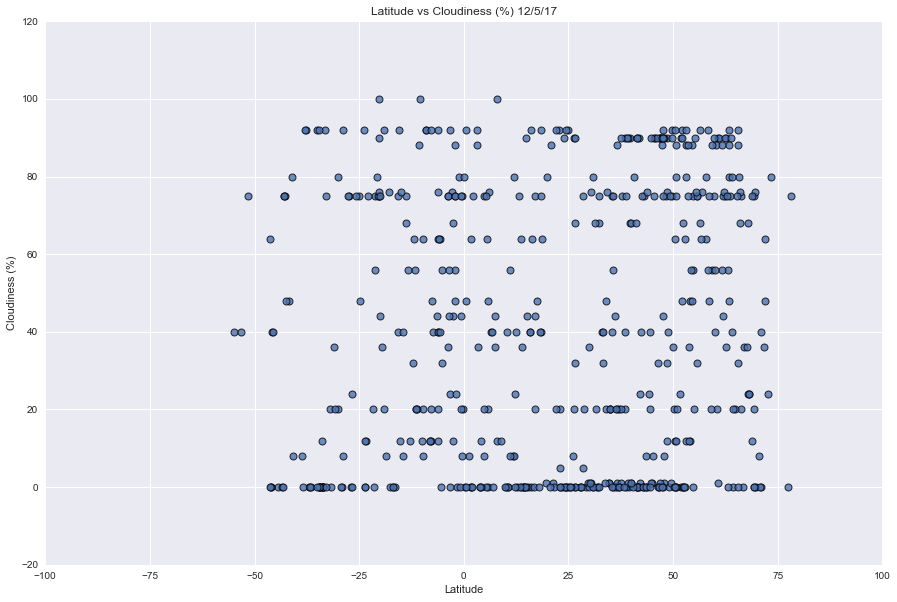

In [41]:
sns.set()
plt.figure(figsize=(15,10))
plt.scatter(new_df["Latitude"],
           new_df["Cloudiness %"],
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8)

plt.title("Latitude vs Cloudiness (%) 12/5/17")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)
plt.xlim([-100, 100])
plt.ylim([-20, 120])

# save figure
plt.savefig("LatCloud2.png")

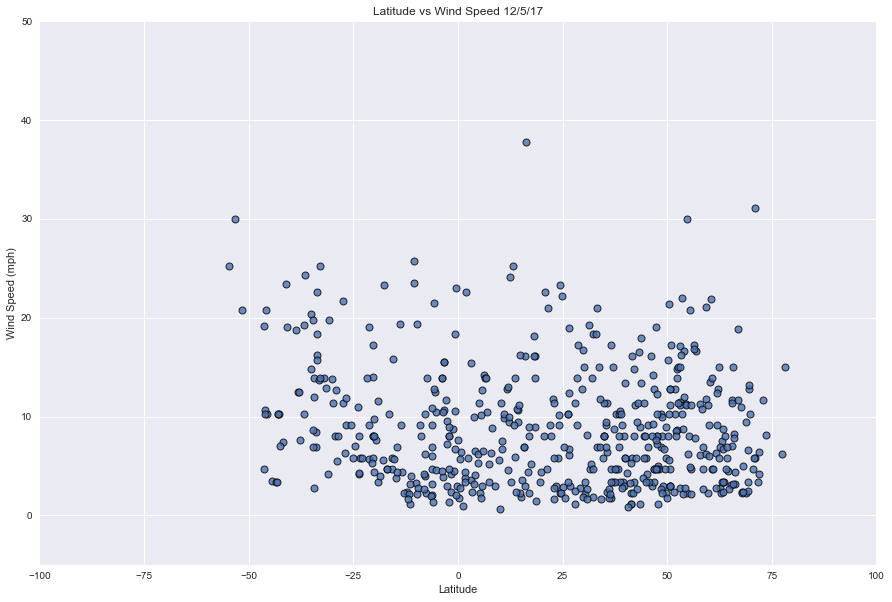

In [42]:
sns.set()
plt.figure(figsize=(15,10))
plt.scatter(new_df["Latitude"],
           new_df["Wind Speed"],
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8)

plt.title("Latitude vs Wind Speed 12/5/17")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)
plt.xlim([-100, 100])
plt.ylim([-5, 50])

# save figure
plt.savefig("LatWind2.png")